# Getting the data

In [ ]:
"""""""""""""""""
import yfinance as yf

tickers = {
    "Navigator": "NVG.LS",
    "Altri": "ALTR.LS",
    "UPM_Kymmene": "UPM.HE",
    "Stora_Enso": "STERV.HE",
    "Mondi": "MNDI.L",
    "Smurfit_Kappa": "SKG.IR",
    "International_Paper": "IP",
    "WestRock": "WRK",
    "Suzano": "SUZ",
    "Klabin": "KLBN11.SA",
    "Nine_Dragons": "2689.HK",
    "WOOD_ETF": "WOOD",
    "CUT_ETF": "CUT"
}

data = {}
for name, ticker in tickers.items():
    try:
        df = yf.download(ticker,  period="60d", interval="1h")
        if not df.empty:
            data[name] = df
            print(f"✅ {name} downloaded")
        else:
            print(f"⚠️ No data for {name}")
    except Exception as e:
        print(f"❌ Error for {name}: {e}")

# Optional: Save each to CSV
for name, df in data.items():
    df.to_csv(f"{name}.csv")
"""""""""

In [41]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [55]:
companies=["Navigator", "Altri", "UPM_Kymmene", "Stora_Enso", "Mondi",
        "International_Paper", "Suzano",
       "Klabin", "Nine_Dragons", "WOOD_ETF", "CUT_ETF"]

# Initialize the dataframe dictionary
dataframe = {}

for ticker in companies:
    try:
        # Read CSV with proper parameters: skip first 2 rows, use first column as index
        df = pd.read_csv(f"{ticker}.csv", skiprows=2, index_col=0, parse_dates=True)
        # Set proper column names
        df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
        dataframe[ticker] = df
        print(f"✅ {ticker} loaded successfully")
    except FileNotFoundError:
        print(f"❌ File {ticker}.csv not found")
    except Exception as e:
        print(f"❌ Error loading {ticker}: {e}")

✅ Navigator loaded successfully
✅ Altri loaded successfully
✅ UPM_Kymmene loaded successfully
✅ Stora_Enso loaded successfully
✅ Mondi loaded successfully
✅ International_Paper loaded successfully
✅ Suzano loaded successfully
✅ Klabin loaded successfully
✅ Nine_Dragons loaded successfully
✅ WOOD_ETF loaded successfully
✅ CUT_ETF loaded successfully


In [57]:
altri= dataframe["Altri"]
upm_kymmene = dataframe["UPM_Kymmene"]  
navigator = dataframe["Navigator"]
stora_enso = dataframe["Stora_Enso"]
mondi = dataframe["Mondi"]
international_paper = dataframe["International_Paper"]
suzano = dataframe["Suzano"]
klabin = dataframe["Klabin"]
nine_dragons = dataframe["Nine_Dragons"]
wood_etf = dataframe["WOOD_ETF"]
cut_etf = dataframe["CUT_ETF"]

In [62]:
# Mapping company keys to their timezones
timezone_map = {
    "Altri": "Europe/Lisbon",
    "UPM_Kymmene": "Europe/Helsinki",
    "Navigator": "Europe/Lisbon",
    "Stora_Enso": "Europe/Helsinki",
    "Mondi": "Europe/London",  # Using London for simplicity
    "International_Paper": "America/New_York",
    "Suzano": "America/Sao_Paulo",
    "Klabin": "America/Sao_Paulo",
    "Nine_Dragons": "Asia/Hong_Kong",
    "WOOD_ETF": "America/New_York",
    "CUT_ETF": "America/New_York"
}

for company, tz in timezone_map.items():
    df = dataframe[company]
    if df.index.tz is None:
        df.index = df.index.tz_localize('UTC')  # Localize naive index as UTC first
    df.index = df.index.tz_convert(tz)
    dataframe[company] = df

print("✅ Converted timestamps to local market times for all companies")

✅ Converted timestamps to local market times for all companies


Available companies for plotting: ['Navigator', 'Altri', 'UPM_Kymmene', 'Stora_Enso', 'Mondi', 'International_Paper', 'Suzano', 'Klabin', 'Nine_Dragons', 'WOOD_ETF', 'CUT_ETF']


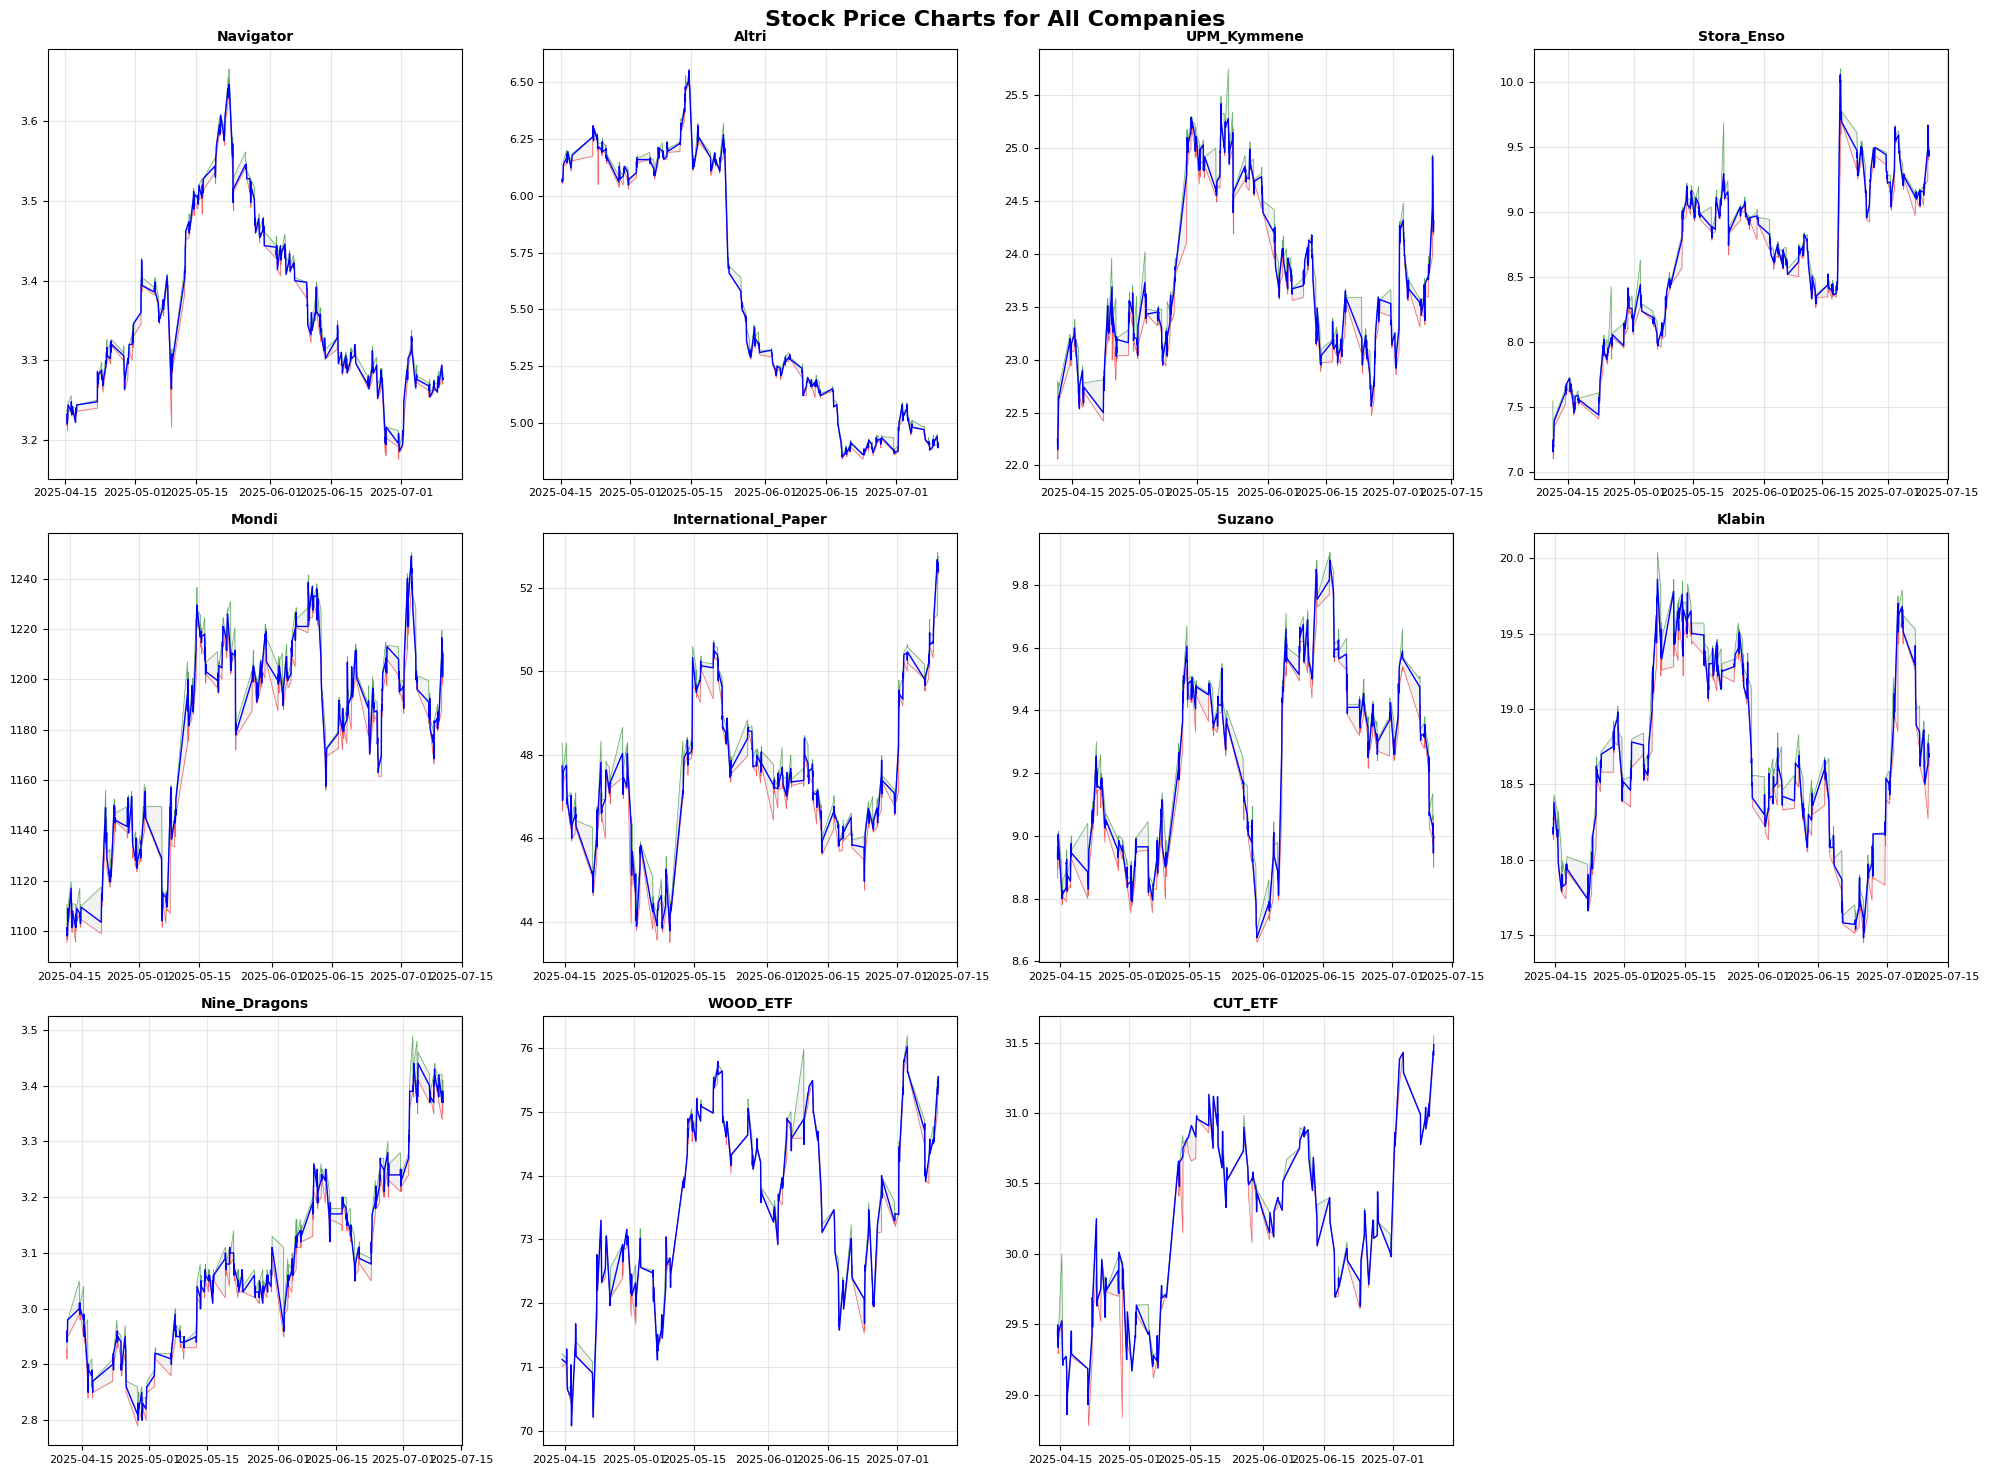

In [69]:
# Simple OHLC charts using basic matplotlib
import matplotlib.pyplot as plt

# Filter companies that were successfully loaded
available_companies = [comp for comp in companies if comp in dataframe.keys()]
print(f"Available companies for plotting: {available_companies}")

# Create a grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for i, company in enumerate(available_companies):
    if i >= 12:  # Limit to 12 plots
        break
        
    data = dataframe[company]
    
    # Plot OHLC as simple lines
    axes[i].plot(data.index, data['High'], color='green', alpha=0.6, linewidth=0.5, label='High')
    axes[i].plot(data.index, data['Low'], color='red', alpha=0.6, linewidth=0.5, label='Low')
    axes[i].plot(data.index, data['Close'], color='blue', linewidth=1, label='Close')
    axes[i].fill_between(data.index, data['Low'], data['High'], alpha=0.1, color='gray')
    
    axes[i].set_title(company, fontsize=10, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Hide unused subplots
for i in range(len(available_companies), 12):
    axes[i].set_visible(False)

plt.suptitle('Stock Price Charts for All Companies', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()